In [21]:
sms_raw <- read.csv("sms_spam.csv", stringsAsFactors = FALSE)

# Display the structure of the dataset
str(sms_raw)

'data.frame':	5559 obs. of  2 variables:
 $ type: chr  "ham" "ham" "ham" "spam" ...
 $ text: chr  "Hope you are having a good week. Just checking in" "K..give back my thanks." "Am also doing in cbe only. But have to pay." "complimentary 4 STAR Ibiza Holiday or £10,000 cash needs your URGENT collection. 09066364349 NOW from Landline "| __truncated__ ...


In [22]:
# Convert "type" to "factor"
sms_raw$type <- factor(sms_raw$type)

# Check for correctness
str(sms_raw$type)

# Check the counts and percentages of ham/spam messages
table(sms_raw$type)
round(proportions(table(sms_raw$type)) * 100, digits = 1)

 Factor w/ 2 levels "ham","spam": 1 1 1 2 2 1 1 1 2 1 ...



 ham spam 
4812  747 


 ham spam 
86.6 13.4 

In [23]:
# Need to install.packages("tm")
library(tm)

# Create the volatile corpus from the raw text messages
sms_corpus <- VCorpus(VectorSource(sms_raw$text))

# Alternative way to create the corpus using the pipe operator %>%
#library(magrittr)
#sms_corpus <- sms_raw$text %>% VectorSource() %>% VCorpus()

In [24]:
inspect(sms_corpus[1:4])

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 4

[[1]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 49

[[2]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 23

[[3]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 43

[[4]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 149



In [25]:
as.character(sms_corpus[[1]])

[1] "Hope you are having a good week. Just checking in"

In [26]:
lapply(sms_corpus[1:4], as.character)

$`1`
[1] "Hope you are having a good week. Just checking in"

$`2`
[1] "K..give back my thanks."

$`3`
[1] "Am also doing in cbe only. But have to pay."

$`4`
[1] "complimentary 4 STAR Ibiza Holiday or £10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+"

In [27]:
sms_corpus_clean <- tm_map(sms_corpus, content_transformer(tolower))

In [28]:
as.character(sms_corpus[[1]])
as.character(sms_corpus_clean[[1]])

[1] "Hope you are having a good week. Just checking in"

[1] "hope you are having a good week. just checking in"

In [29]:
sms_corpus_clean <- tm_map(sms_corpus_clean, removeNumbers)

# Check the effect of the action
as.character(sms_corpus[[4]])
as.character(sms_corpus_clean[[4]])

[1] "complimentary 4 STAR Ibiza Holiday or £10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+"

[1] "complimentary  star ibiza holiday or £, cash needs your urgent collection.  now from landline not to lose out! boxskwpppm+"

In [30]:
# Remove stop words implemented in the function "stopwords()"
sms_corpus_clean <- tm_map(sms_corpus_clean, removeWords, stopwords())

# Check the effect of the action
as.character(sms_corpus[[1]])
as.character(sms_corpus_clean[[1]])

[1] "Hope you are having a good week. Just checking in"

[1] "hope     good week. just checking "

In [31]:
# Remove punctuation in a straightforward, perhaps naive, way
sms_corpus_clean <- tm_map(sms_corpus_clean, removePunctuation)

# Check the effect of the action
as.character(sms_corpus[[2]])
as.character(sms_corpus_clean[[2]])

[1] "K..give back my thanks."

[1] "kgive back  thanks"

In [32]:
# install.packages("SnowballC")
library(SnowballC)

# See how stemming works
wordStem(c("learn", "learned", "learning", "learns", "learner"))

# Apply stemming to the corpus
sms_corpus_clean <- tm_map(sms_corpus_clean, stemDocument)

# Check the effect of the action
as.character(sms_corpus[[17]])
as.character(sms_corpus_clean[[17]])

[1] "learn"   "learn"   "learn"   "learn"   "learner"

[1] "Darren was saying dat if u meeting da ge den we dun meet 4 dinner. Cos later u leave xy will feel awkward. Den u meet him 4 lunch lor."

[1] "darren say dat u meet da ge den dun meet dinner cos later u leav xy will feel awkward den u meet lunch lor"

In [33]:
# Strip whitescape characters from the corpus
sms_corpus_clean <- tm_map(sms_corpus_clean, stripWhitespace)

# Check the effect of the action
as.character(sms_corpus[[1]])
as.character(sms_corpus_clean[[1]])

[1] "Hope you are having a good week. Just checking in"

[1] "hope good week just check"

In [34]:
# Display the first 4 messages in the text form
lapply(sms_corpus[1:4], as.character)

# Display the first 4 messages in the text form
lapply(sms_corpus_clean[1:4], as.character)

$`1`
[1] "Hope you are having a good week. Just checking in"

$`2`
[1] "K..give back my thanks."

$`3`
[1] "Am also doing in cbe only. But have to pay."

$`4`
[1] "complimentary 4 STAR Ibiza Holiday or £10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+"

$`1`
[1] "hope good week just check"

$`2`
[1] "kgive back thank"

$`3`
[1] "also cbe pay"

$`4`
[1] "complimentari star ibiza holiday £ cash need urgent collect now landlin lose boxskwpppm"

In [35]:
# Create a document-term matrix (DTM)
sms_dtm <- DocumentTermMatrix(sms_corpus_clean)

# Display the DTM
sms_dtm

<<DocumentTermMatrix (documents: 5559, terms: 6542)>>
Non-/sparse entries: 42112/36324866
Sparsity           : 100%
Maximal term length: 40
Weighting          : term frequency (tf)

In [36]:
# Generate a DTM directly from the raw corpus ("sms_corpus")
sms_dtm2 <- DocumentTermMatrix(sms_corpus, control = list(
    tolower = TRUE,
    removeNumbers = TRUE,
    stopwords = TRUE,
    removePunctuation = TRUE,
    stemming = TRUE
    )
)

# Display the DTM
sms_dtm2

<<DocumentTermMatrix (documents: 5559, terms: 6940)>>
Non-/sparse entries: 43185/38536275
Sparsity           : 100%
Maximal term length: 40
Weighting          : term frequency (tf)

In [37]:
# Structure of the DTM
str(sms_dtm2)

List of 6
 $ i       : int [1:43185] 1 1 1 1 1 2 2 2 3 3 ...
 $ j       : int [1:43185] 987 2342 2679 3069 6549 446 3125 5909 200 936 ...
 $ v       : num [1:43185] 1 1 1 1 1 1 1 1 1 1 ...
 $ nrow    : int 5559
 $ ncol    : int 6940
 $ dimnames:List of 2
  ..$ Docs : chr [1:5559] "1" "2" "3" "4" ...
  ..$ Terms: chr [1:6940] "‘morrow" "‘rent" "“harri" "“it" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


In [38]:
# Split the DTM into training and test datasets
sms_dtm_train <- sms_dtm[1:4169, ]
sms_dtm_test <- sms_dtm[4170:5559, ]

# Save the training and test labels for later
sms_train_labels <- sms_raw$type[1:4169]
sms_test_labels <- sms_raw$type[4170:5559]

# Confirm that the subsets are representative of the complete set
round(proportions(table(sms_train_labels)) * 100, 1)
round(proportions(table(sms_test_labels)) * 100, 1)

sms_train_labels
 ham spam 
86.5 13.5 

sms_test_labels
 ham spam 
86.8 13.2 

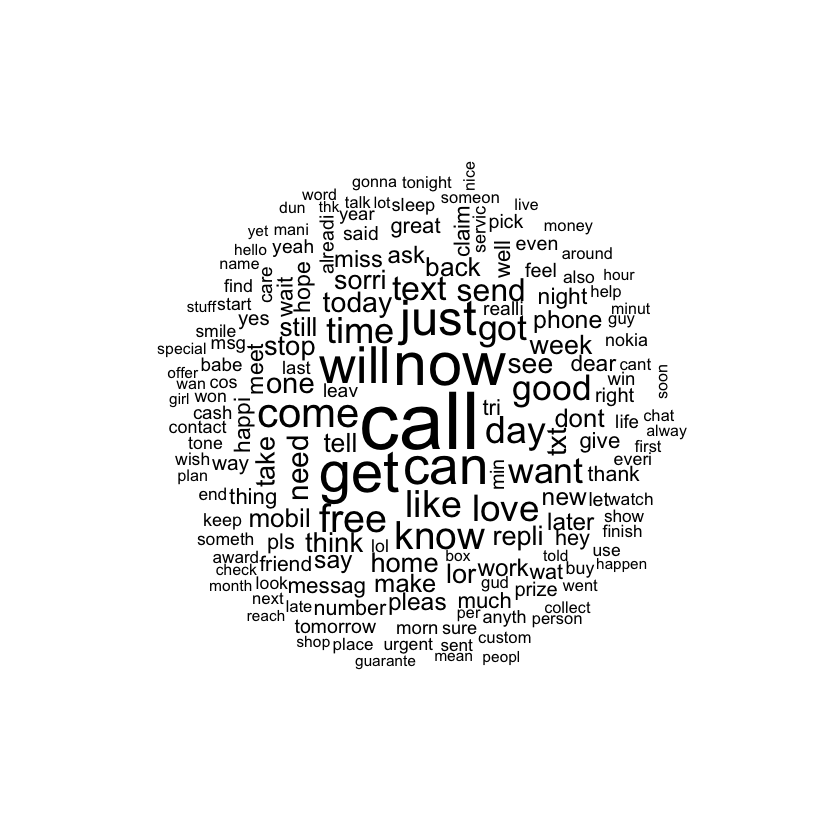

In [40]:
# install.packages("wordcloud")
library(wordcloud)

# Display a word cloud with words appearing at least 50 times, more frequent words near the center of the cloud
wordcloud(sms_corpus_clean, min.freq = 50, random.order = FALSE)

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


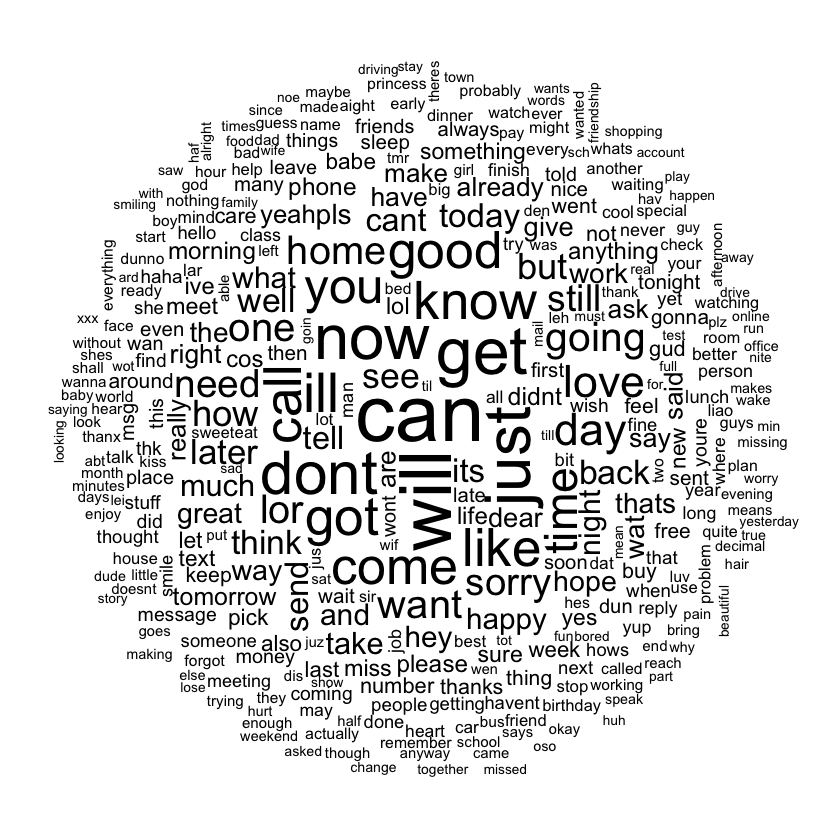

In [42]:
wordcloud(subset(sms_raw, type == "ham")$text, min.freq = 20, random.order = FALSE)

In [43]:
# Find terms that appear at least 5 times (highfreq = Inf is a default that can be changed)
sms_freq_words <- findFreqTerms(sms_dtm_train, lowfreq = 5)

# Let's see the structure of the frequent words
str(sms_freq_words)

 chr [1:1137] "£wk" "abiola" "abl" "abt" "accept" "access" "account" ...


In [44]:
# Retrieve only the frequent words and save result in new DTMs
sms_dtm_freq_train <- sms_dtm_train[ , sms_freq_words]
sms_dtm_freq_test <- sms_dtm_test[ , sms_freq_words]

# Let's verify that our 1,137 words are present
str(sms_dtm_freq_train)

List of 6
 $ i       : int [1:24942] 1 1 1 1 1 2 2 3 3 4 ...
 $ j       : int [1:24942] 153 392 442 491 1083 71 971 32 708 140 ...
 $ v       : num [1:24942] 1 1 1 1 1 1 1 1 1 1 ...
 $ nrow    : int 4169
 $ ncol    : int 1137
 $ dimnames:List of 2
  ..$ Docs : chr [1:4169] "1" "2" "3" "4" ...
  ..$ Terms: chr [1:1137] "£wk" "abiola" "abl" "abt" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


In [45]:
# Define the function that converts positive counts to "Yes", rest to "No"
convert_counts <- function(x) {
    x <- ifelse(x > 0, "Yes", "No")
}

# Apply this function to the columns of the training and test sets
sms_train <- apply(X = sms_dtm_freq_train, MARGIN = 2, FUN = convert_counts)
sms_test <- apply(X = sms_dtm_freq_test, MARGIN = 2, FUN = convert_counts)

# Check that the results have the right form
str(sms_train)
str(sms_test)

 chr [1:4169, 1:1137] "No" "No" "No" "No" "No" "No" "No" "No" "No" "No" ...
 - attr(*, "dimnames")=List of 2
  ..$ Docs : chr [1:4169] "1" "2" "3" "4" ...
  ..$ Terms: chr [1:1137] "£wk" "abiola" "abl" "abt" ...
 chr [1:1390, 1:1137] "No" "No" "No" "No" "No" "No" "No" "No" "No" "No" ...
 - attr(*, "dimnames")=List of 2
  ..$ Docs : chr [1:1390] "4170" "4171" "4172" "4173" ...
  ..$ Terms: chr [1:1137] "£wk" "abiola" "abl" "abt" ...


In [46]:
# install.packages("e1071")
library(e1071)

# Train the classifier on the training dataset with the training labels
sms_classifier <- naiveBayes(sms_train, sms_train_labels)

In [47]:
# Apply the classifier to the test dataset to make predictions
sms_test_pred <- predict(sms_classifier, sms_test)


In [48]:
# Summary and a quick table for the prediction results
str(sms_test_pred)
table(sms_test_pred)

 Factor w/ 2 levels "ham","spam": 1 1 1 1 2 1 1 1 1 2 ...


sms_test_pred
 ham spam 
1231  159 

In [49]:
# Save the model, test set/labels/predictions into a file that can be loaded in using "load("sms_classifier.RData")"
save(sms_classifier, sms_test, sms_test_labels, sms_test_pred, file = "sms_classifier.RData")

In [50]:
# Load the library
library(gmodels)

# Generate the confusion matrix with the true labels in rows, predictions in columns
CrossTable(sms_test_labels, sms_test_pred, dnn = c("Actual", "Predicted"), prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1390 

 
             | Predicted 
      Actual |       ham |      spam | Row Total | 
-------------|-----------|-----------|-----------|
         ham |      1201 |         6 |      1207 | 
             |     0.864 |     0.004 |           | 
-------------|-----------|-----------|-----------|
        spam |        30 |       153 |       183 | 
             |     0.022 |     0.110 |           | 
-------------|-----------|-----------|-----------|
Column Total |      1231 |       159 |      1390 | 
-------------|-----------|-----------|-----------|

 


In [51]:
# Train the classifier on the training dataset with the training labels
sms_classifier2 <- naiveBayes(sms_train, sms_train_labels, laplace = 0.5)

# Apply the classifier to the test dataset to make predictions
sms_test_pred2 <- predict(sms_classifier2, sms_test)

# Generate the confusion matrix with the true labels in rows, predictions in columns
CrossTable(sms_test_labels, sms_test_pred2, dnn = c("Actual", "Predicted"), prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1390 

 
             | Predicted 
      Actual |       ham |      spam | Row Total | 
-------------|-----------|-----------|-----------|
         ham |      1197 |        10 |      1207 | 
             |     0.861 |     0.007 |           | 
-------------|-----------|-----------|-----------|
        spam |        22 |       161 |       183 | 
             |     0.016 |     0.116 |           | 
-------------|-----------|-----------|-----------|
Column Total |      1219 |       171 |      1390 | 
-------------|-----------|-----------|-----------|

 


In [52]:
# Use the original model to output probabilities
sms_test_prob = predict(sms_classifier, sms_test, type = "raw")

# Check the structure of the output
str(sms_test_prob)


 num [1:1390, 1:2] 1.00 1.00 1.00 1.00 4.31e-10 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:2] "ham" "spam"


In [53]:
# Generate prediction focusing more on fewer false positives
sms_test_pred_75 = ifelse(sms_test_prob[ , 2] > 0.75, "spam", "ham")

# Generate the confusion matrix with the true labels in rows, predictions in columns
CrossTable(sms_test_labels, sms_test_pred_75, dnn = c("Actual", "Predicted"), prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1390 

 
             | Predicted 
      Actual |       ham |      spam | Row Total | 
-------------|-----------|-----------|-----------|
         ham |      1205 |         2 |      1207 | 
             |     0.867 |     0.001 |           | 
-------------|-----------|-----------|-----------|
        spam |        32 |       151 |       183 | 
             |     0.023 |     0.109 |           | 
-------------|-----------|-----------|-----------|
Column Total |      1237 |       153 |      1390 | 
-------------|-----------|-----------|-----------|

 
